In [1]:
import dill
import scenicplus
infile = open('/home/adufour/work/scenic_omics/all_v4/SCENIC/scplus_obj.pkl', 'rb')
scplus_obj = dill.load(infile)
infile.close()

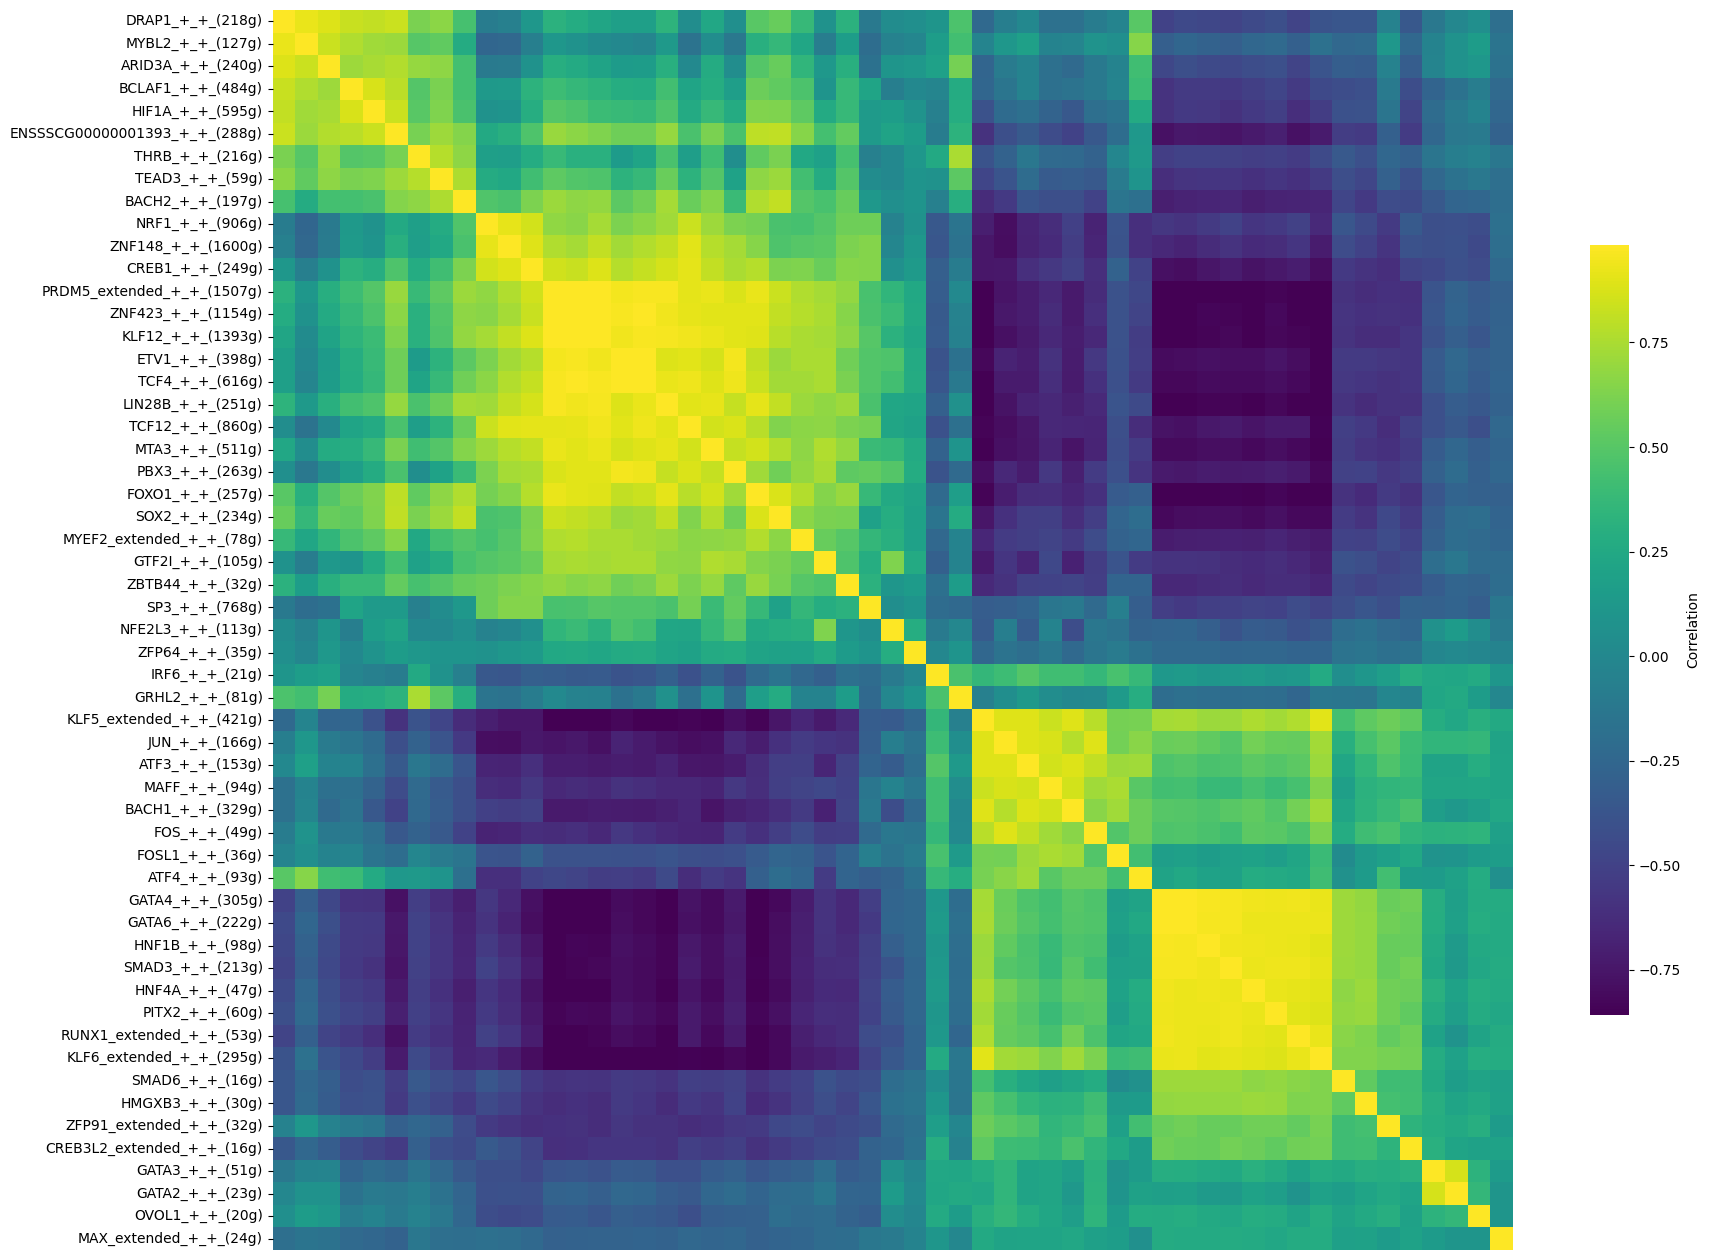

In [3]:
from scenicplus.plotting.correlation_plot import *
correlation_heatmap(scplus_obj,
                    auc_key = 'eRegulon_AUC',
                    signature_keys = ['Gene_based'],
                    selected_regulons = scplus_obj.uns['selected_eRegulons']['Gene_based'],
                    fcluster_threshold = 0.1,
                    use_plotly = False,
                    fontsize = 3)

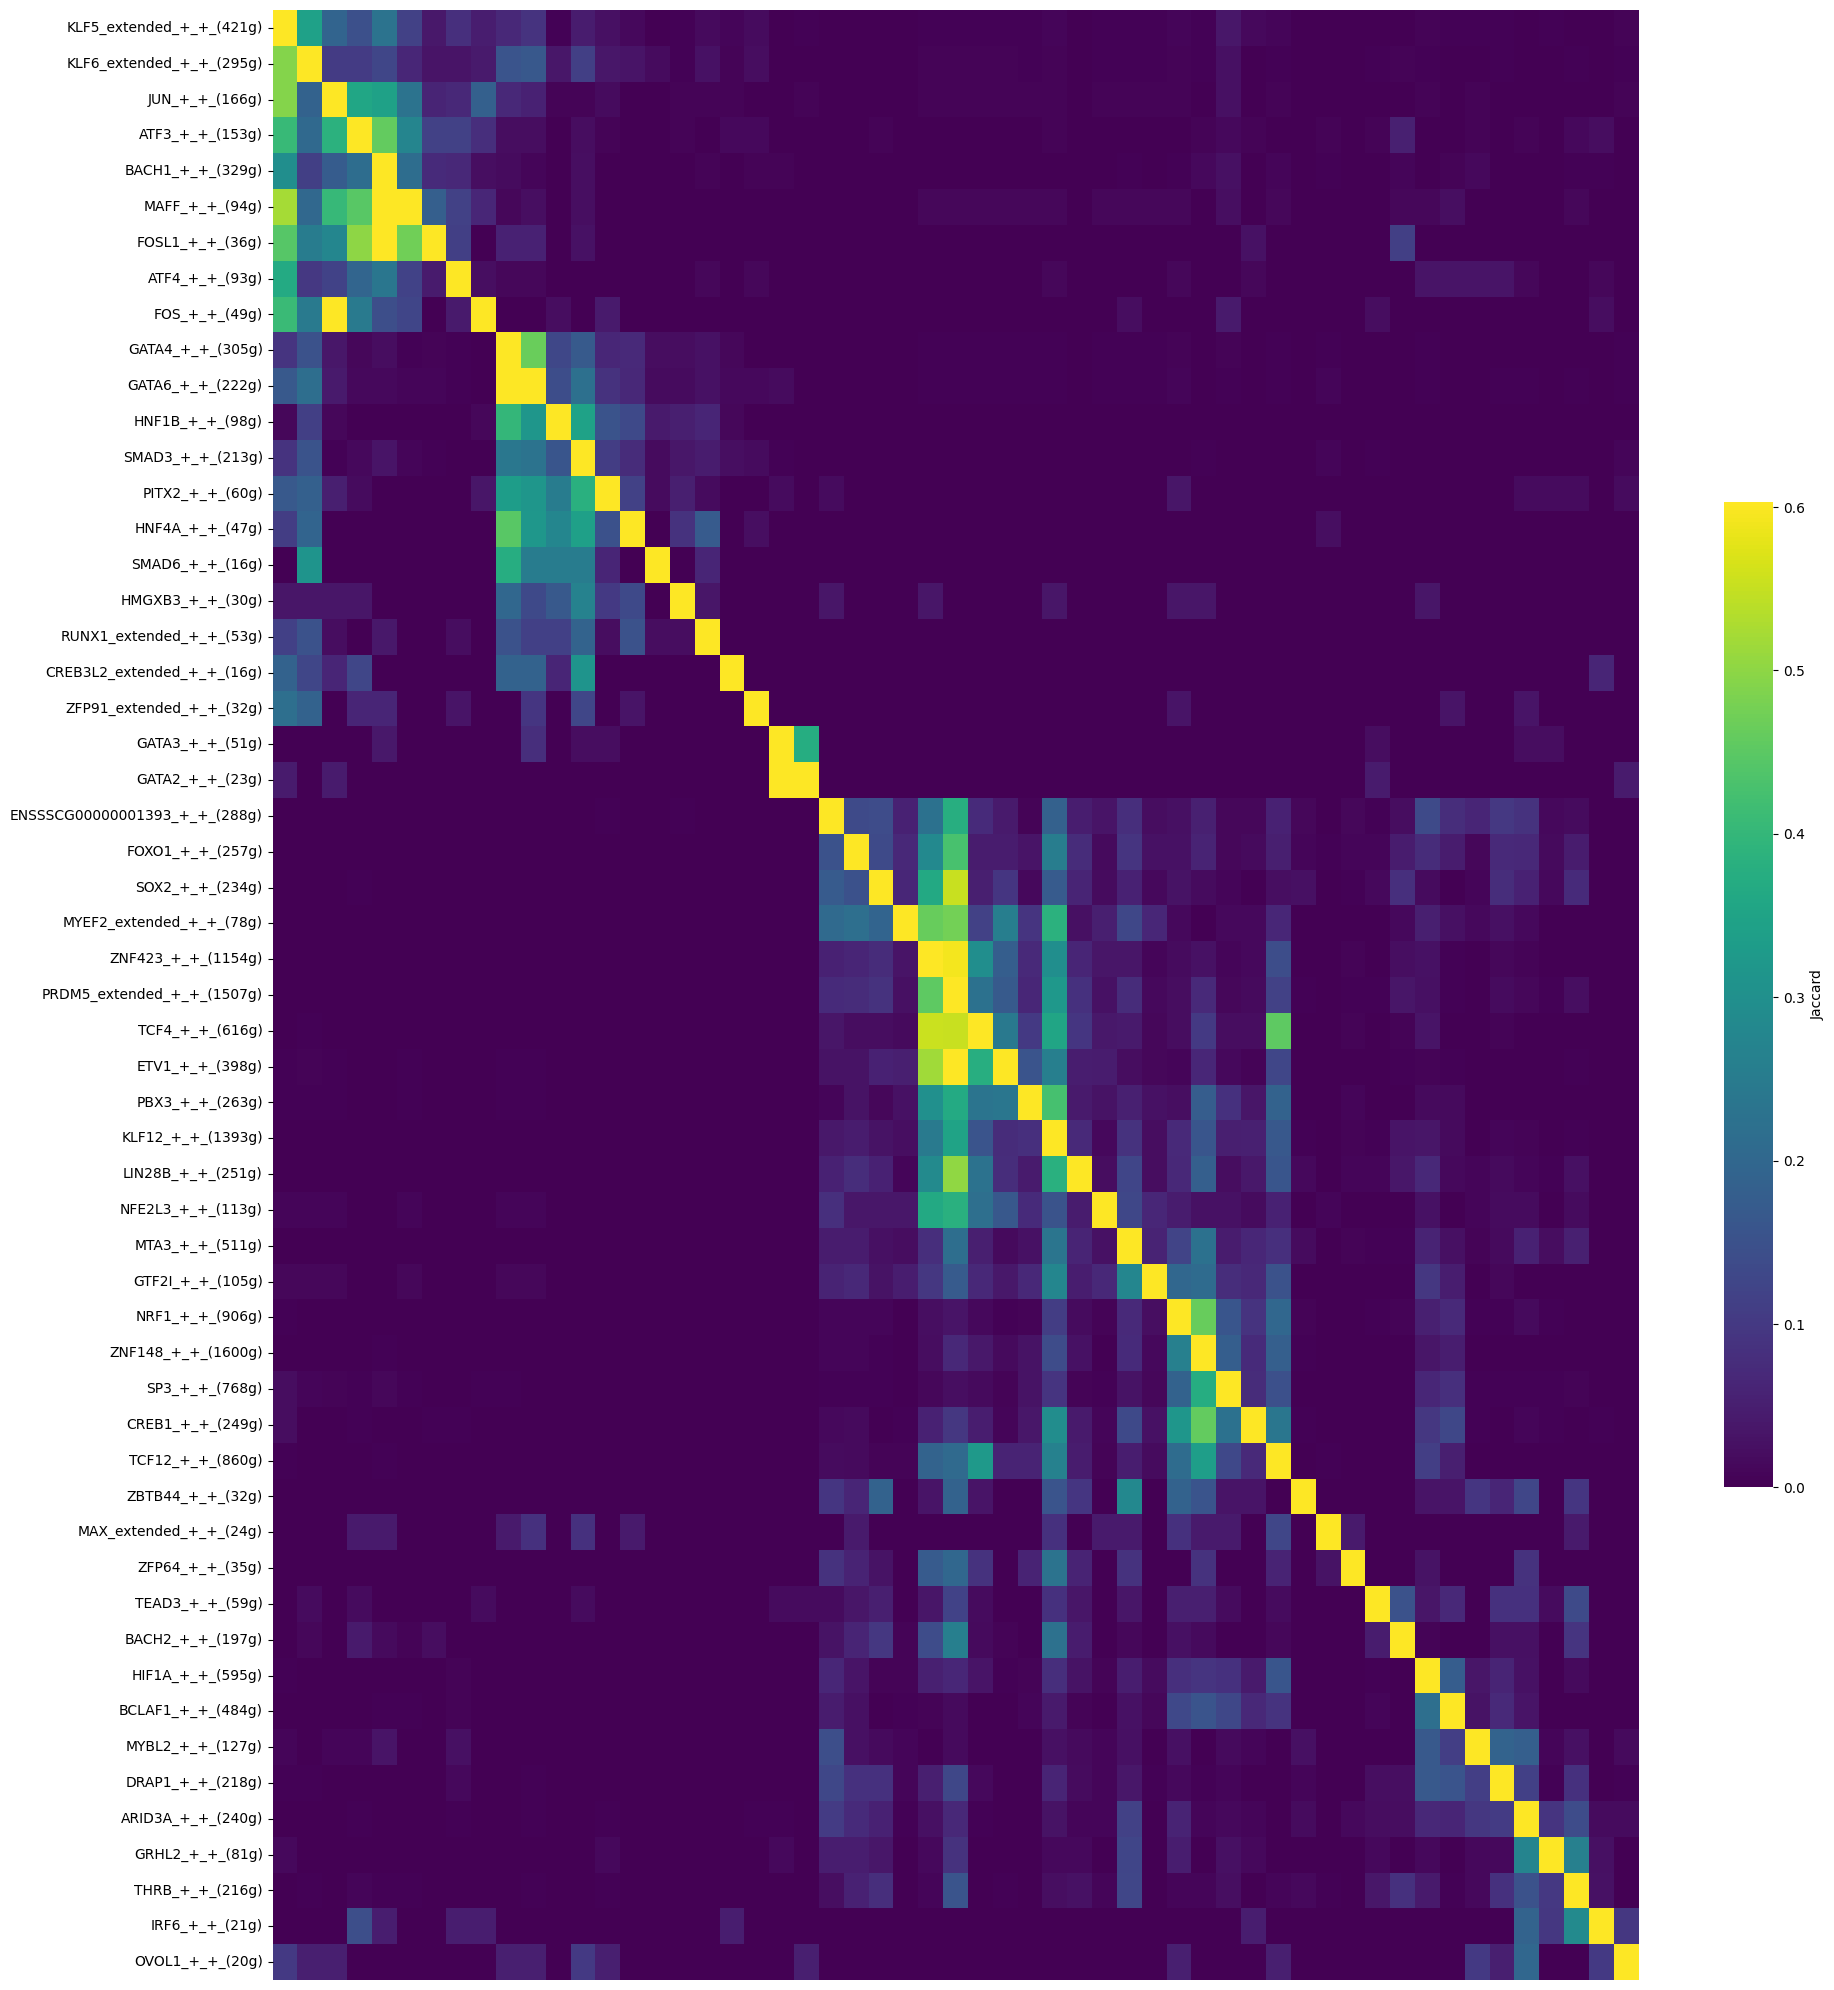

In [9]:
#from scenicplus.plotting.correlation_plot import *
jaccard_heatmap(scplus_obj,
                    gene_or_region_based = 'Gene_based',
                    signature_key = 'eRegulon_signatures',
                    selected_regulons = scplus_obj.uns['selected_eRegulons']['Gene_based'],
                    fcluster_threshold = 0.1,
                    fontsize = 3,
                    save = '/home/adufour/work/notebook/plots/omics/scenic_jaccard.svg',
                    use_plotly = False,
                    method='intersect')

In [30]:
binarize_AUC(scplus_obj,
             auc_key='eRegulon_AUC',
             out_key='eRegulon_AUC_thresholds',
             signature_keys=['Gene_based', 'Region_based'],
             n_cpu=1)

In [10]:
from scenicplus.dimensionality_reduction import *
run_eRegulons_umap(scplus_obj,
                   reduction_name='eRegulons_UMAP_gb', scale=True, signature_keys=['Gene_based', 'Region_based'], selected_regulons=scplus_obj.uns['selected_eRegulons']['Gene_based'])
run_eRegulons_tsne(scplus_obj,
                   scale=True, signature_keys=['Gene_based', 'Region_based'], selected_regulons=scplus_obj.uns['selected_eRegulons']['Gene_based'])

/home/adufour/work/mambaforge-pypy3/envs/scenicplus/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/adufour/work/mambaforge-pypy3/envs/scenicplus/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/adufour/work/mambaforge-pypy3/en

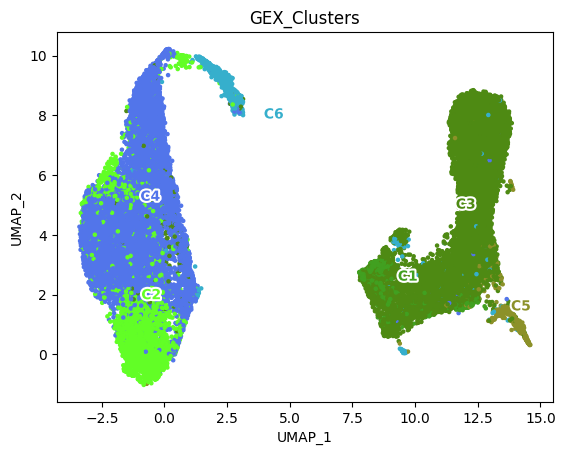

In [5]:
from scenicplus.dimensionality_reduction import *
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gb',
                 variables=['GEX_Clusters'],
                 num_columns=1,
                 text_size=10,
                 dot_size=5)

In [6]:
find_clusters(scplus_obj,
              signature_keys=['Gene_based', 'Region_based'],
              k = 10,
              res = [0.6, 1.2, 1.5],
              prefix = 'SCENIC+_',
              scale = True)

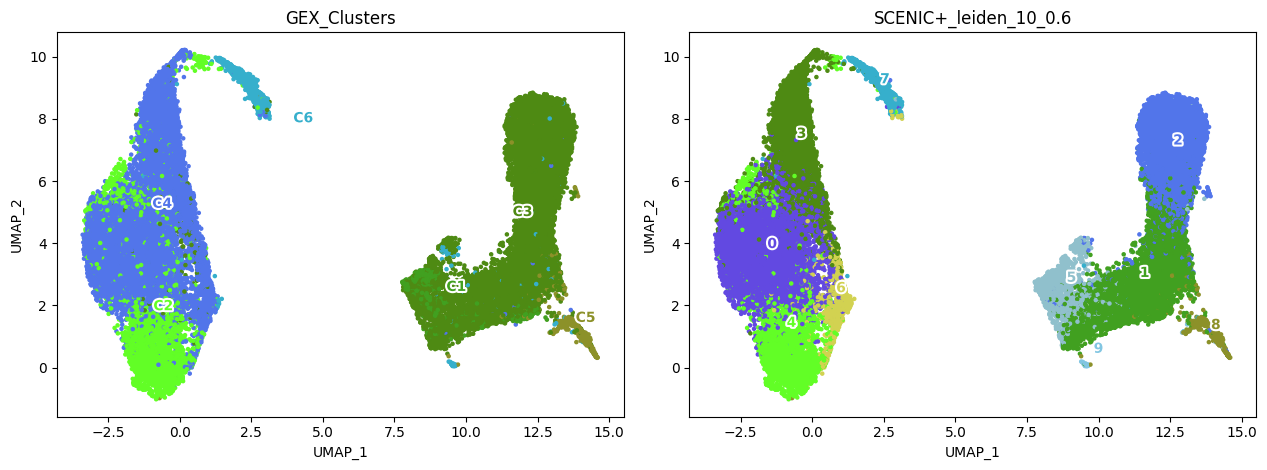

In [7]:
plot_metadata(scplus_obj,
                 reduction_name='eRegulons_UMAP_gb',
                 variables=['GEX_Clusters', 'SCENIC+_leiden_10_0.6'],
                 num_columns=2,
                 text_size=10,
                 dot_size=5)

In [20]:
from scenicplus.RSS import *
regulon_specificity_scores(scplus_obj,
                         'GEX_Clusters',
                         signature_keys=['Gene_based'],
                         selected_regulons=scplus_obj.uns['eRegulon_signatures']['Gene_based'],
                         out_key_suffix='_gene_based',
                         scale=False)

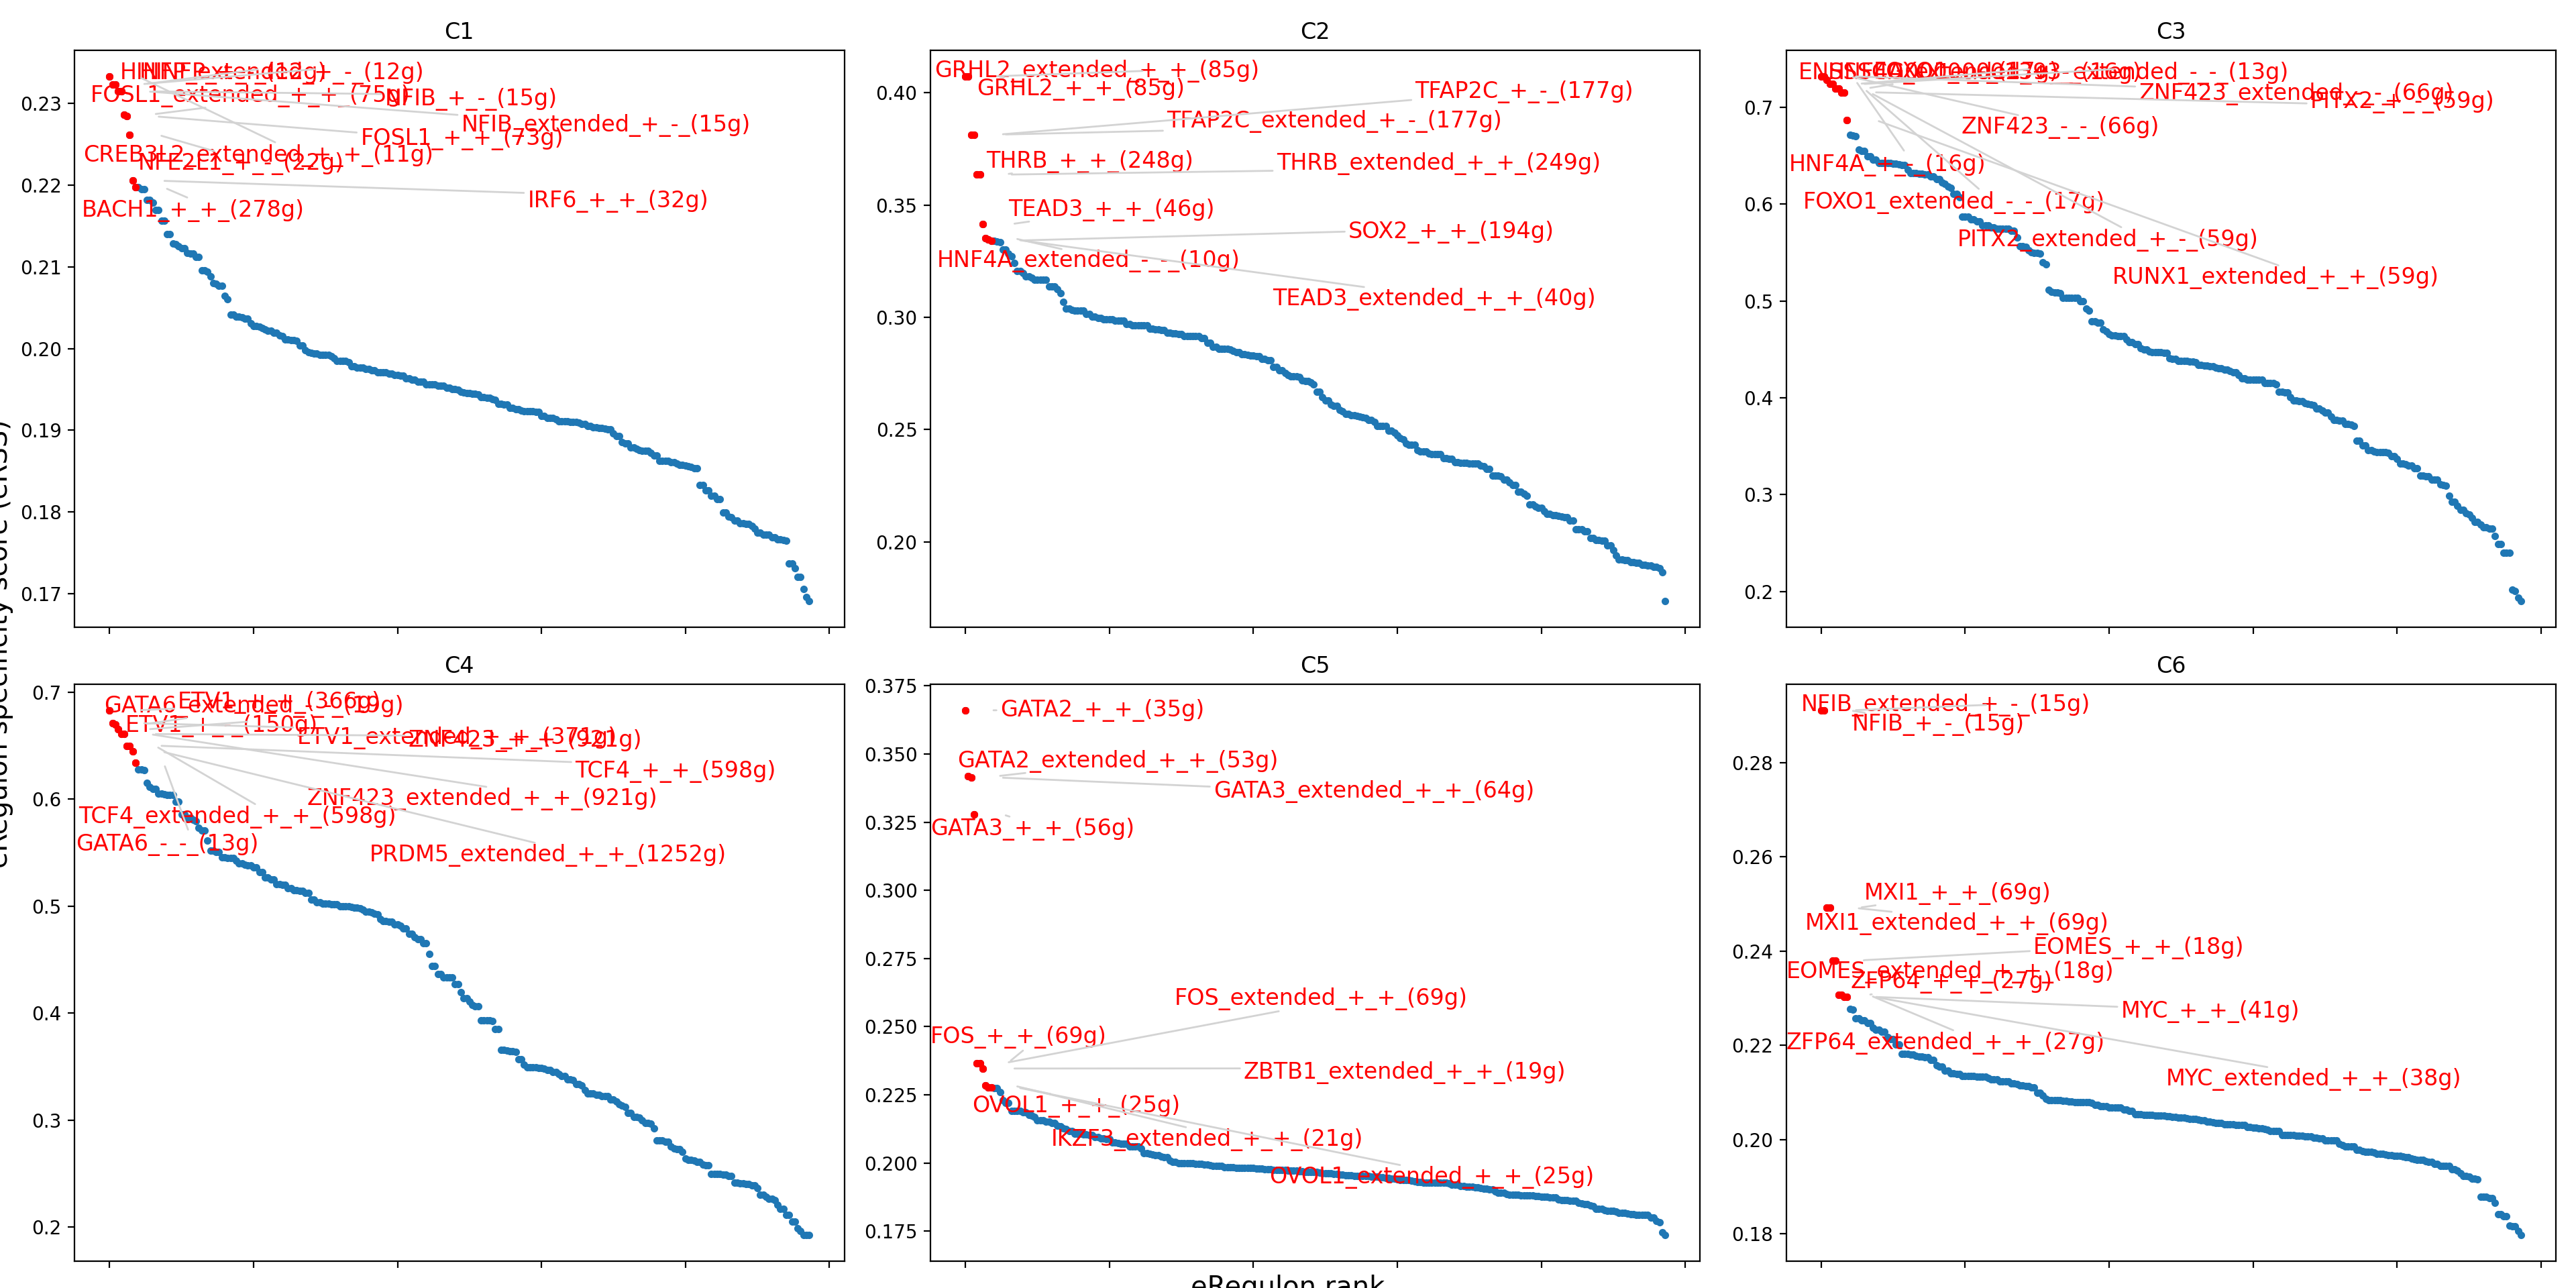

In [21]:
plot_rss(scplus_obj, 'GEX_Clusters_gene_based', num_columns=3, top_n=10)

In [ ]:
import dill
import os
work_dir = '/home/adufour/work/scenic_omics/all_v4/'
with open(os.path.join(work_dir, 'SCENIC/scplus_obj.pkl'), 'wb') as f:
  dill.dump(scplus_obj, f)

In [2]:
scplus_obj.uns['eRegulon_metadata'].to_csv('/home/adufour/work/table/eregulons_metadata.csv', index=True)

In [3]:
# Correlation between region based regulons and gene based regulons
import pandas
df1 = scplus_obj.uns['eRegulon_AUC']['Gene_based'].copy()
df2 = scplus_obj.uns['eRegulon_AUC']['Region_based'].copy()
df1.columns = [x.split('_(')[0] for x in df1.columns]
df2.columns = [x.split('_(')[0] for x in df2.columns]
correlations = df1.corrwith(df2, axis = 0)
correlations = correlations[abs(correlations) > 0.2]
# Kepp only R2G +
keep = [x for x in correlations.index if '+_+' in x] + [x for x in correlations.index if '-_+' in x]
# Keep extended if not direct
extended = [x for x in keep if 'extended' in x]
direct = [x for x in keep if not 'extended' in x]
keep_extended = [x for x in extended if not x.replace('extended_', '') in direct]
keep = direct + keep_extended
# Keep regulons with more than 10 genes
keep_gene = [x for x in scplus_obj.uns['eRegulon_AUC']['Gene_based'].columns if x.split('_(')[0] in keep]
keep_gene = [x for x in keep_gene if (int(x.split('_(')[1].replace('g)', '')) > 10)]
keep_all = [x.split('_(')[0] for x in keep_gene]
keep_region = [x for x in scplus_obj.uns['eRegulon_AUC']['Region_based'].columns if x.split('_(')[0] in keep]
scplus_obj.uns['selected_eRegulons'] = {}
scplus_obj.uns['selected_eRegulons']['Gene_based'] = keep_gene
scplus_obj.uns['selected_eRegulons']['Region_based'] = keep_region

In [6]:
df1.corrwith(df2, axis = 0).to_csv('/home/adufour/work/table/regulons_list.csv', index=True)

In [2]:
import plotnine

from plotnine import *
from plotnine import data

In [3]:
size_matrix = scplus_obj.uns['eRegulon_AUC']['Gene_based']
color_matrix = scplus_obj.uns['eRegulon_AUC']['Region_based']
subset_eRegulons = scplus_obj.uns['selected_eRegulons']['Gene_based']

In [4]:
subset_eRegulons = [x.split('_(')[0] for x in subset_eRegulons]
size_matrix = size_matrix[[x for x in size_matrix if x.split('_(')[0] in subset_eRegulons]]
color_matrix = color_matrix[[x for x in color_matrix if x.split('_(')[0] in subset_eRegulons]]

In [5]:
from scenicplus.plotting.dotplot import *
from plotnine import guide_legend
plot = heatmap_dotplot(
        scplus_obj = scplus_obj,
        size_matrix = size_matrix,
        color_matrix = color_matrix,
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'GEX_Clusters',
        subset_eRegulons = subset_eRegulons,
        figsize = (35, 10),
        orientation = 'horizontal',
        split_repressor_activator=False)

In [6]:
plotting_df = generate_dotplot_df(
        scplus_obj = scplus_obj,
        size_matrix = size_matrix,
        color_matrix = color_matrix,
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'GEX_Clusters',
        subset_eRegulons = subset_eRegulons)

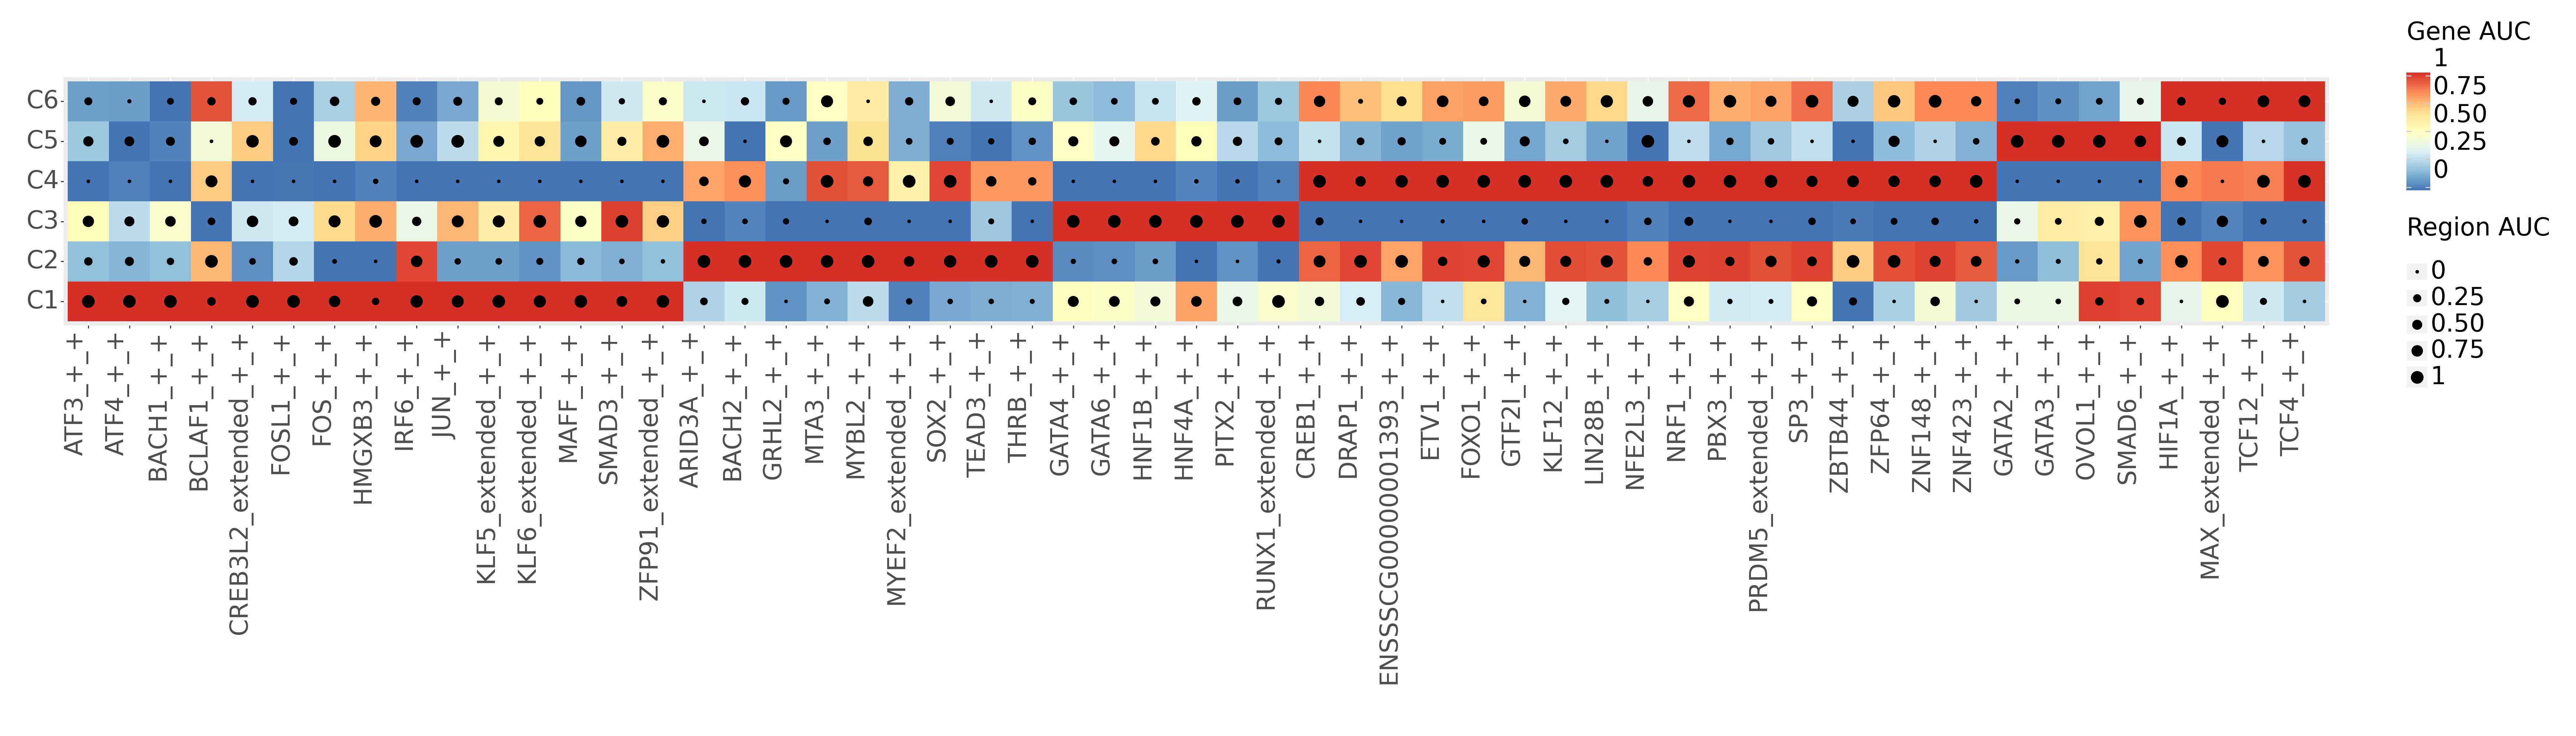

<Figure Size: (3500 x 1000)>

In [8]:
plot = plot + labs(size = 'Region AUC', fill = "Gene AUC") + theme(text=element_text(size = 24),axis_title_x=element_blank(),axis_title_y=element_blank(),axis_text_x=element_text(rotation=90, hjust=1))
plot

In [13]:
plot.save(filename='/home/adufour/work/notebook/plots/omics/scenic_Heatmap.svg', limitsize=False)

/home/adufour/work/mambaforge-pypy3/envs/scenicplus2/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 35 x 10 in image.
/home/adufour/work/mambaforge-pypy3/envs/scenicplus2/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: /home/adufour/work/notebook/plots/omics/scenic_Heatmap.pdf


In [41]:
import dill
work_dir = '/home/adufour/work/scenic_omics/J7'
with open(os.path.join(work_dir, 'SCENIC/scplus_obj.pkl'), 'wb') as f:
  dill.dump(scplus_obj, f)